In [1]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode
import gym
from tqdm import tqdm

#import numpy as np
#import matplotlib.pyplot as plt

# Planning

In [2]:
from utils import ALLOWED_COMPOSITE_MOVES, ALLOWED_SIMPLE_MOVES
from planning import a_star_search, uniform_cost_search, greedy_search, apply

In [3]:
WIDTH = 4
HEIGHT = 4
N_GOLDS = 4
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

SEARCH_ALGORITHMS = [a_star_search, uniform_cost_search, greedy_search]
ALG_NAMES = ['A*', 'Uniform Cost', 'Greedy']
ALLOWED_MOVES_FUNCTIONS = [ALLOWED_SIMPLE_MOVES, ALLOWED_COMPOSITE_MOVES]
MOVE_NAMES = ['simple moves', 'composite moves']

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

planning_stats = {}

for search_algorithm, alg_name in zip(SEARCH_ALGORITHMS, ALG_NAMES):
    temp = {}
    for moves_function, moves_name in zip(ALLOWED_MOVES_FUNCTIONS, MOVE_NAMES):
        plan, n_expanded = search_algorithm(env=env, allowed_moves_function=moves_function)
        temp[moves_name] = {
            'algorithm': search_algorithm,
            'moves': moves_name,
            'plan': plan,
            'n_expanded': n_expanded
        }
        print(f'Algorithm: {alg_name} ({moves_name})\nExpanded nodes: {n_expanded}')
        plan.show(env=env)
        print('\n')
    planning_stats[alg_name] = temp

Starting position: (1, 3), Stair position: (2, 3)
Gold positions: [(2, 2), (0, 1), (0, 3), (1, 2)]

Algorithm: A* (simple moves)
Expanded nodes: 55
Path: [(1, 3), (0, 3), (0, 2), (0, 1), (1, 2), (2, 2), (2, 3)]
Actions: ['W', 'S', 'S', 'NE', 'E', 'N']
Total score: 393.586


Algorithm: A* (composite moves)
Expanded nodes: 75
Path: [(1, 3), (0, 3), (0, 2), (0, 1), (1, 2), (2, 2), (2, 3)]
Actions: ['W', 'S', 'S', 'NE', 'E', 'N']
Total score: 393.586


Algorithm: Uniform Cost (simple moves)
Expanded nodes: 19
Path: [(1, 3), (0, 3), (1, 2), (2, 2), (1, 2), (0, 1), (1, 2), (2, 3)]
Actions: ['W', 'SE', 'E', 'W', 'SW', 'NE', 'NE']
Total score: 391.343


Algorithm: Uniform Cost (composite moves)
Expanded nodes: 26
Path: [(1, 3), (1, 2), (0, 1), (0, 2), (0, 3), (1, 3), (2, 2), (2, 3)]
Actions: ['S', 'SW', 'N', 'N', 'E', 'SE', 'N']
Total score: 392.172


Algorithm: Greedy (simple moves)
Expanded nodes: 222
Path: [(1, 3), (0, 2), (0, 1), (1, 2), (2, 3)]
Actions: ['SW', 'S', 'NE', 'NE']
Total score

In [4]:
application_results = {}

for algorithm in ALG_NAMES:
    temp = {}
    for moves in MOVE_NAMES:
        env.myreset()
        states, rewards, done = apply(env, planning_stats[algorithm][moves]['plan'])
        temp[moves] = {
            'states': states,
            'rewards': rewards,
            'done': done
        }
        rws_round = []
        for r in rewards:
            rws_round.append(round(r, 3))
        sum_rws = sum(rewards)
        sum_rws_round = round(sum_rws, 3)
        print(f'{algorithm} ({moves})\nRewards: {rws_round}, sum: {sum_rws_round}\n')
    application_results[algorithm] = temp

A* (simple moves)
Rewards: [0, 99.0, -1.0, 99.0, 98.586, 99.0, -1.0], sum: 393.586

A* (composite moves)
Rewards: [0, 99.0, -1.0, 99.0, 98.586, 99.0, -1.0], sum: 393.586

Uniform Cost (simple moves)
Rewards: [0, 99.0, 98.586, 99.0, -1.0, 98.586, -1.414, -1.414], sum: 391.343

Uniform Cost (composite moves)
Rewards: [0, 99.0, 98.586, -1.0, 99.0, -1.0, 98.586, -1.0], sum: 392.172

Greedy (simple moves)
Rewards: [0, -1.414, 99.0, 98.586, -1.414], sum: 194.757

Greedy (composite moves)
Rewards: [0, -1.414, 99.0, 98.586, -1.414], sum: 194.757



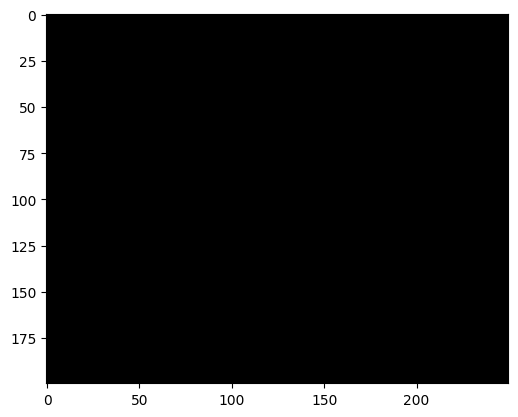

In [5]:
show_episode(application_results['A*']['simple moves']['states'], clear_output=True)

## Online search

In [2]:
from online_search import online_greedy_search, online_random_greedy_search, simulated_annealing

In [20]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 5
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, i = online_greedy_search(env=env, max_steps=MAX_STEPS)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (3, 4), Stair position: (2, 0)
Gold positions: [(1, 2), (1, 0), (4, 3), (3, 4), (4, 2)]

Online Greedy Search
Rewards: [0.0, 98.586, 99.0, -1.0, -201.414, -1.0], sum: -5.828



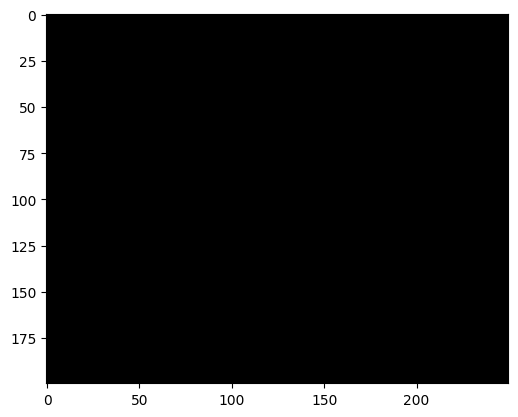

In [21]:
show_episode(states, clear_output=True)

In [16]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, iters, steps = simulated_annealing(env=env, max_steps=MAX_STEPS, k=1)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (0, 4), Stair position: (2, 0)
Gold positions: [(1, 1), (0, 1), (1, 3), (2, 4), (2, 0)]

Online Greedy Search
Rewards: [0.0, -1.0, -1.414, -1.414, 99.0, 98.586, -1.0, -1.414, -1.414, -1.0, -1.0, -1.414, -1.0, 98.586, -1.414, -1.414, -1.0, -1.0, 98.586], sum: 377.858



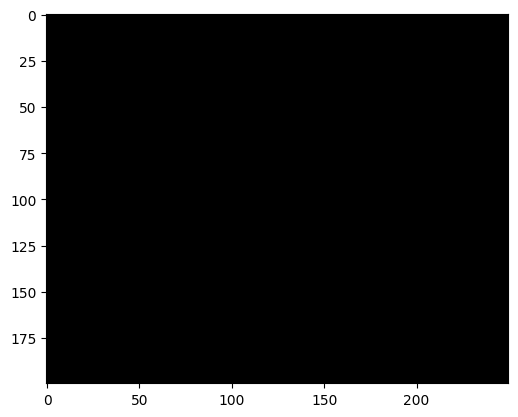

In [45]:
show_episode(states, clear_output=True)

In [55]:
print(done)
print(iters)
print(steps)

True
24
21


In [41]:
WIDTH = 5
HEIGHT = 5
N_GOLDS = 5
N_LEPS = 5
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 100

env = gym.make(
    'MiniHack-MyTask-Custom-v0',
    width=WIDTH,
    height=HEIGHT,
    n_leps=N_LEPS,
    n_golds=N_GOLDS,
    max_episode_steps=MAX_STEPS,
    gold_score=GOLD_SCORE,
    stair_score=STAIR_SCORE,
    time_penalty=TIME_PENALTY
    )

print(f'Starting position: {env.agent_coord}, Stair position: {env.stair_coord}')
print(f'Gold positions: {env.gold_coords}\n')

env.myreset()
states, rewards, done, i = online_random_greedy_search(env=env, max_steps=MAX_STEPS, prob_rand_move=1, decay=0)
rws_round = [round(r, 3) for r in rewards]
sum_rws_round = round(sum(rewards), 3)
print(f'Online Greedy Search\nRewards: {rws_round}, sum: {sum_rws_round}\n')

Starting position: (3, 0), Stair position: (2, 2)
Gold positions: [(1, 3), (2, 0), (2, 3), (0, 2), (0, 1)]

Online Greedy Search
Rewards: [0.0, -1.0, -1.414, -1.414, -1.0, -1.414, -1.0, -1.414, -1.0, -1.414, -1.414, -1.414, -1.0, -1.414, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.414], sum: -25.728



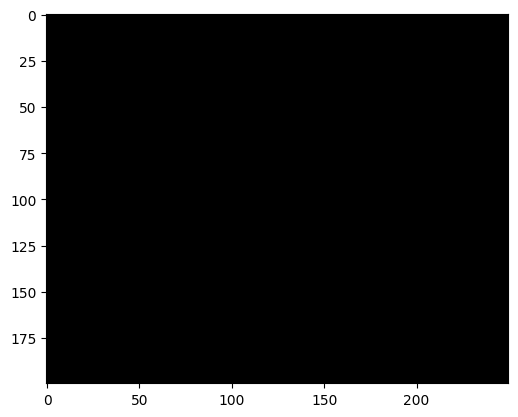

In [38]:
show_episode(states, clear_output=True)

In [42]:
print(done)
print(i)

True
22


In [9]:
WIDTH = list(range(4, 11))
HEIGHT = WIDTH
N_GOLDS = lambda width, height: int(width * height * 0.1)
N_LEPS = 0
GOLD_SCORE = 100
STAIR_SCORE = 0
TIME_PENALTY = -1
MAX_STEPS = 1000
SAMPLES_PER_SETTING = 10

settings = []

for width, height in zip(WIDTH, HEIGHT):
    for n_golds in tqdm(range(N_GOLDS(width=width, height=height)), total=N_GOLDS(width=width, height=height), desc=f'{width}x{height}'):
        setting = {
            'width': width,
            'height': height,
            'n_golds': n_golds,
            'samples': [],
            'stats': []
        }
        for _ in range(SAMPLES_PER_SETTING):
            env = gym.make(
                'MiniHack-MyTask-Custom-v0',
                width=width,
                height=height,
                n_leps=N_LEPS,
                n_golds=n_golds,
                max_episode_steps=MAX_STEPS,
                gold_score=GOLD_SCORE,
                stair_score=STAIR_SCORE,
                time_penalty=TIME_PENALTY
                )
            
            setting['samples'].append(env)

            plan, n_expanded = a_star_search(env=env, allowed_moves_function=ALLOWED_SIMPLE_MOVES)

            # -----------------------------------------------------------------------------------------------------------

            env.myreset()
            states, rewards, done = apply(env, plan)

            rws_round = []
            for r in rewards:
                rws_round.append(round(r, 3))
            sum_rws = sum(rewards)
            sum_rws_round = round(sum_rws, 3)

            sample_stats = {
                'optimal_score': sum_rws_round,
                'optimal_path': plan.path
            }

            # -----------------------------------------------------------------------------------------------------------

            env.myreset()
            states, rewards, done, i = online_search_f(env=env, max_steps=MAX_STEPS)

            rws_round = [round(r, 3) for r in rewards]
            sum_rws_round = round(sum(rewards), 3)

            sample_stats['online_search_score'] = sum_rws_round
            sample_stats['online_search_path'] = [state['agent_coord'] for state in states]

            setting['stats'].append(sample_stats)

            # -----------------------------------------------------------------------------------------------------------

    settings.append(setting)



4x4:   0%|          | 0/1 [00:00<?, ?it/s]

10x10: 100%|██████████| 10/10 [03:47<00:00, 22.74s/it]


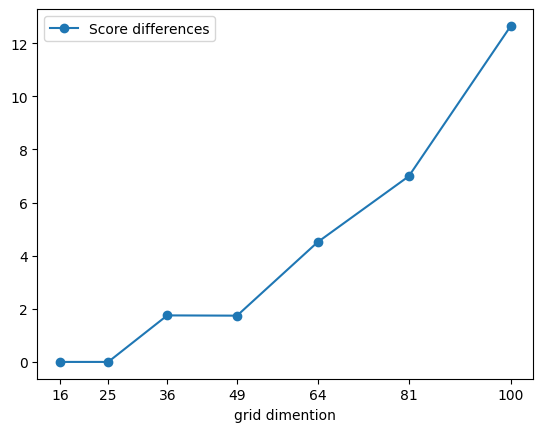

In [10]:
score_dists = [np.mean([np.abs(np.array(setting['stats'][i]['optimal_score']) - np.array(setting['stats'][i]['online_search_score'])) for i in range(SAMPLES_PER_SETTING)]) for setting in settings]

x_values = [width * height for width, height in zip(WIDTH, HEIGHT)]
y_values = score_dists

plt.plot(x_values, y_values, label='Score differences', marker='o')
plt.xticks(x_values, x_values)

plt.xlabel('grid dimention')

plt.legend()

plt.show()

## --

In [28]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode
import gym
from tqdm import tqdm
import json
from typing import Callable, List
import numpy as np
import matplotlib.pyplot as plt
from online_search import online_greedy_search, online_random_greedy_search, simulated_annealing

In [3]:
WIDTH = [2, 3, 4, 5, 6, 7, 8]
HEIGHT = WIDTH
N_GOLDS = lambda width, height: 3#lambda width, height: int(width * height * 0.4)
N_LEPS = lambda width, height: 3#lambda width, height: int(width * height * 0.4)
GOLD_SCORE = [1, 2, 3, 4, 5]
STAIR_SCORE = 0
TIME_PENALTY = [-1]#[-1, -2, -3, -4, -5]

MAX_STEPS = 1000
EPISODES_PER_INIT = 5

#episode = {
#    'init': {
#        'width':
#        'height':
#        'n_golds':
#        'n_leps':
#        'gold_score':
#        'time_penalty':
#    }
#    'algorithm': 
#    'results': {
#        'rewards':
#        'steps':
#        'iters':
#        'gold_thefts':
#        'gold_gains':
##mean, var, kurt, ent
#    }
#}

episodes = []

for width, height in zip(WIDTH, HEIGHT):
    for time_penalty in TIME_PENALTY:
        for gold_score in GOLD_SCORE:
            for n_golds in range(1, N_GOLDS(width=width, height=height)):
                for n_leps in tqdm(range(N_LEPS(width=width, height=height)), total=N_LEPS(width=width, height=height), desc=f'Num golds: {n_golds}, Gold score: {gold_score}, Size: {width}x{height}'):
                    #for time_penalty in TIME_PENALTY:
                    init = {
                        'width': width,
                        'height': height,
                        'n_golds': n_golds,
                        'n_leps': n_leps,
                        'gold_score': gold_score
                    }

                    for _ in range(EPISODES_PER_INIT):

                        env = gym.make(
                            'MiniHack-MyTask-Custom-v0',
                            width=width,
                            height=height,
                            n_leps=n_leps,
                            n_golds=n_golds,
                            max_episode_steps=MAX_STEPS,
                            gold_score=gold_score,
                            stair_score=STAIR_SCORE,
                            time_penalty=time_penalty
                            )

                        env.myreset()
                        states, rewards, done, iters = online_greedy_search(env=env, max_steps=MAX_STEPS)

                        gold_thefts = [-gold_score for r in rewards if r < time_penalty]
                        gold_gains = [gold_score for r in rewards if r > time_penalty]

                        algorithm = 'online_greedy_search'

                        results = {
                            'rewards':rewards,
                            'steps': iters,
                            'iters': iters,
                            'gold_thefts': gold_thefts,
                            'gold_gains': gold_gains
                        }

                        episode = {
                            'init': init,
                            'algorithm': algorithm,
                            'results': results
                        }

                        episodes.append(episode)

Num golds: 2, Gold score: 5, Size: 8x8: 100%|██████████| 3/3 [00:01<00:00,  1.79it/s]


In [4]:
with open('episodes.json', 'w') as f:
    json.dump(episodes, f)

In [3]:
with open('episodes.json', 'r') as f:
    episodes = json.load(f)

In [6]:
episodes[0]

{'init': {'width': 2, 'height': 2, 'n_golds': 1, 'n_leps': 0, 'gold_score': 1},
 'algorithm': 'online_greedy_search',
 'results': {'rewards': [0.0, -1.0],
  'steps': 1,
  'iters': 1,
  'gold_thefts': [],
  'gold_gains': [1]}}

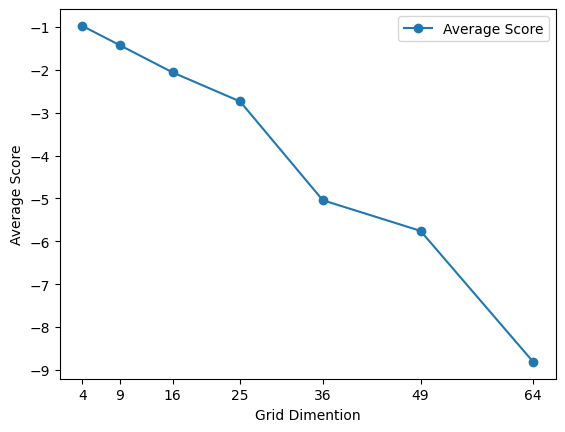

In [19]:
WIDTH = [2, 3, 4, 5, 6, 7, 8]
HEIGHT = WIDTH
def get_values(episodes: list, fixed_variables: List[str], fixed_values: List[float], variable_of_interest: str, f: Callable[list, list] = (lambda x: x)):
    
    values_of_interest = [episode['results'][variable_of_interest] for episode in episodes if np.all([episode['init'][fixed_variable] == fixed_value for fixed_variable, fixed_value in zip(fixed_variables, fixed_values)])]
    return f(values_of_interest)

values_to_plot = []
for w in WIDTH:
    final_scores = get_values(fixed_variables=['width'], fixed_values=[w], variable_of_interest='rewards', f=(lambda x: [np.sum(item) for item in x]), episodes=episodes)
    values_to_plot.append(np.mean(final_scores))

x_values = [width * height for width, height in zip(WIDTH, HEIGHT)]
y_values = values_to_plot

plt.plot(x_values, y_values, label='Average Score', marker='o')
plt.xticks(x_values, x_values)

plt.xlabel('Grid Dimention')
plt.ylabel('Average Score')

plt.legend()

plt.show()

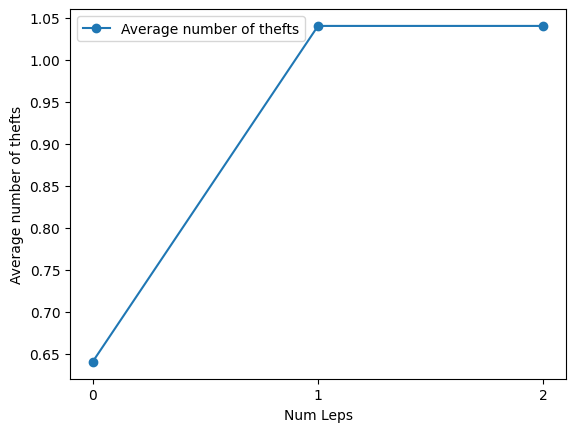

In [27]:
N_GOLDS = lambda width, height: 3#lambda width, height: int(width * height * 0.4)
N_LEPS = lambda width, height: 3#lambda width, height: int(width * height * 0.4)

values_to_plot = []
for n_leps in range(N_LEPS(8, 8)):
    n_gold_thefts = get_values(fixed_variables=['n_leps', 'width'], fixed_values=[n_leps, 6], variable_of_interest='gold_thefts', f=(lambda x: [len(item) for item in x]), episodes=episodes)
    values_to_plot.append(np.mean(n_gold_thefts))

x_values = [n_leps for n_leps in range(N_LEPS(8, 8))]
y_values = values_to_plot

plt.plot(x_values, y_values, label='Average number of thefts', marker='o')
plt.xticks(x_values, x_values)

plt.xlabel('Num Leps')
plt.ylabel('Average number of thefts')

plt.legend()

plt.show()

In [1]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, run_episodes
import gym
from tqdm import tqdm
import json
from typing import Callable, List
import numpy as np
import matplotlib.pyplot as plt
from online_search import online_greedy_search, online_random_greedy_search, simulated_annealing

In [2]:
from gold_room_env import MiniHackGoldRoom
from utils import show_episode, run_episodes
import gym
from tqdm import tqdm
import json
from typing import Callable, List
import numpy as np
import matplotlib.pyplot as plt
from online_search import online_greedy_search, online_random_greedy_search, simulated_annealing

WIDTHS = [4, 6, 8]
HEIGHTS = WIDTHS
N_GOLDS = [1, 4, 8]
N_LEPS = [0, 2, 4]
GOLD_SCORES = [1, 2, 10]
STAIR_SCORES = [0]
TIME_PENALTIES = [-1, -2]#[-1, -2, -3, -4, -5]

MAX_STEPS = 1000
EPISODES_PER_INIT = 5

episodes = run_episodes(
    widths = WIDTHS,
    heights = HEIGHTS,
    n_golds = N_GOLDS,
    n_leps = N_LEPS,
    gold_scores = GOLD_SCORES,
    stair_scores = STAIR_SCORES,
    time_penalties = TIME_PENALTIES,
    algorithms = [online_greedy_search, online_random_greedy_search],
    alg_paramss = [[{}], [{'prob_rand_move': 0.9, 'decay': 0}, {'prob_rand_move': 0.5, 'decay': 0.5}]],
    max_steps = MAX_STEPS,
    n_episodes = EPISODES_PER_INIT
    )

Size: 8x8: 100%|██████████| 2/2 [03:19<00:00, 99.51s/it]


In [3]:
with open('episodes3.json', 'w') as f:
    json.dump(episodes, f)

In [2]:
with open('episodes3.json', 'r') as f:
    episodes = json.load(f)

In [5]:
episodes[0]

{'init': {'width': 4,
  'height': 4,
  'n_golds': 1,
  'n_leps': 0,
  'gold_score': 1,
  'time_penalty': -1},
 'algorithm': {'name': 'online_greedy_search', 'params': {}},
 'results': {'rewards': [0.0, 0.0, -1.4142135623730951],
  'steps': 2,
  'iters': 2,
  'gold_thefts': [-1],
  'gold_gains': [1, 1],
  'done': True}}

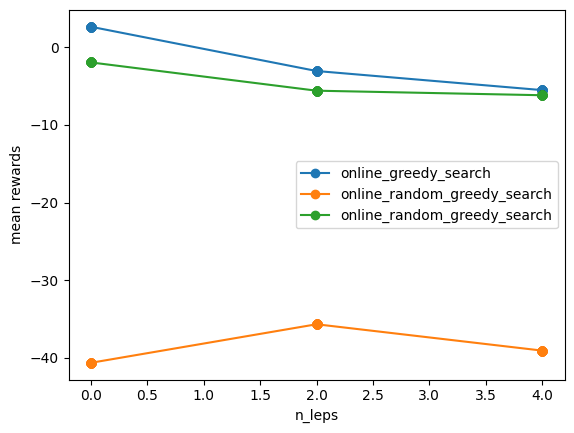

In [17]:
from utils import get_plot

plt = get_plot(
    episodes = episodes[0:2000],
    fixed = [('n_golds', 4)],
    x_variable = 'n_leps',
    y_variable = 'rewards',
    f = lambda x: sum(x)
)
plt.show()